In [1]:
using PyPlot
# proximal gradient method
include("proxgrad.jl")

proxgrad_const (generic function with 1 method)

In [2]:
"""plot line w*x+b=0"""
function plotline(w::Array{Float64,1},b::Number;
                  xmin=-100,xmax=100,
                  kwargs...)
    x1samples = [xmin, xmax]
    # w[1]*x[1]+w[2]*x[2]+b = 0
    x2samples = (-b - w[1]*x1samples)/w[2]
    plot(x1samples, x2samples, color="black", kwargs...)
end

plotline

In [3]:
# Loss functions for classification

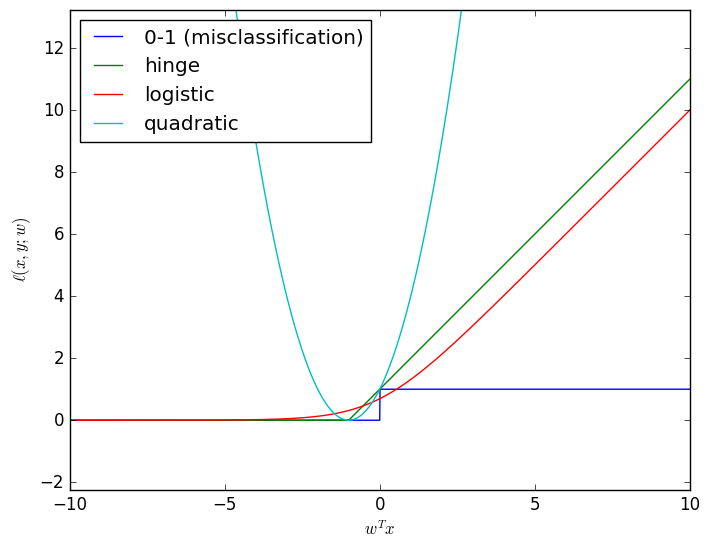

In [4]:
lim = 10
z = -lim:.01:lim
y = -1
clf()
hold(true)
plot(z, -y*(z.>0), label="0-1 (misclassification)")
plot(z, max(1-y*z, 0), label="hinge")
plot(z, log(1+exp(-y*z)), label="logistic")
plot(z, (z-y).^2, label="quadratic")
xlabel(L"$w^T x$")
ylabel(L"$\ell(x,y; w)$")
if y==1
    legend()
else
    legend(loc=2)
end
axis("equal")
ylim(0,lim+1)
savefig("classification_loss_y=$(y)_lim=$lim.eps")

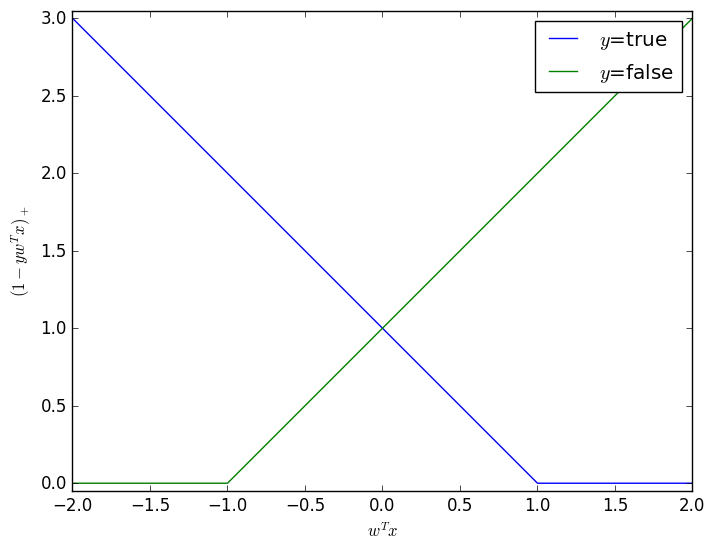

In [5]:
ht(u::Float64) = evaluate(HingeLoss(), u, true)
hf(u::Float64) = evaluate(HingeLoss(), u, false)
x = -2:.1:2
plot(x, map(ht,x), label=L"$y$=true")
plot(x, map(hf,x), label=L"$y$=false")
legend()
axis("equal")
xlabel(L"$w^T x$")
ylabel(L"$(1-yw^Tx)_+$")
savefig("hingeloss.pdf")

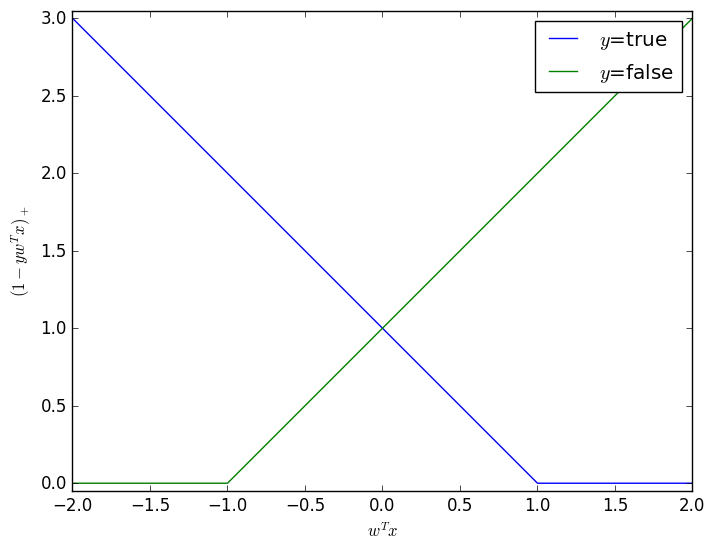

In [6]:
ht(u::Float64) = evaluate(LogisticLoss(), u, true)
hf(u::Float64) = evaluate(LogisticLoss(), u, false)
x = -2:.1:2
plot(x, map(ht,x), label=L"$y$=true")
plot(x, map(hf,x), label=L"$y$=false")
legend()
axis("equal")
xlabel(L"$w^T x$")
ylabel(L"$(1-yw^Tx)_+$")
savefig("logisticloss.pdf")

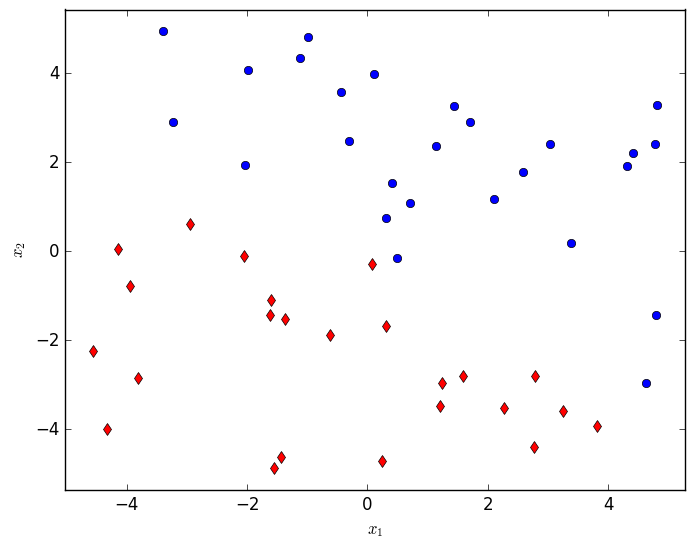

(-5.02610948036884,5.27846424709235)

In [7]:
# Generate and plot data
srand(5)
n = 50
function sample_data(num_points; noise=0)
    X = rand(num_points,2)*10 - 5
    y = (X*[.3, .4] + noise*randn(num_points)) .> 0
    return X,y
end
X,y = sample_data(n, noise=0)
# X,y = sample_data(n, noise=1)

"""function to plot the above data"""
function plotdata(X=X,y=y; margin=.05)
    hold(true)
    for i=1:length(y)
        if y[i]==1
            plot(X[i,1],X[i,2],"bo")
        else
            plot(X[i,1],X[i,2],"rd")
        end
    end
    xlabel(L"x_1")
    ylabel(L"x_2")
    range_y = maximum(X[:,2]) - minimum(X[:,2])
    range_x = maximum(X[:,1]) - minimum(X[:,1])
    ylim([minimum(X[:,2])-margin*range_y,maximum(X[:,2])+margin*range_y])
    xlim([minimum(X[:,1])-margin*range_x,maximum(X[:,1])+margin*range_x])
end
plotdata()

# Hinge loss

In [8]:
n = length(y)
Xoffset = [X ones(n)]
loss = 1/n*HingeLoss()
w_hinge = proxgrad(loss, ZeroReg(), Xoffset, y, stepsize=1, maxiters=50000)

3-element Array{Float64,1}:
 1.49591 
 2.01248 
 0.151048

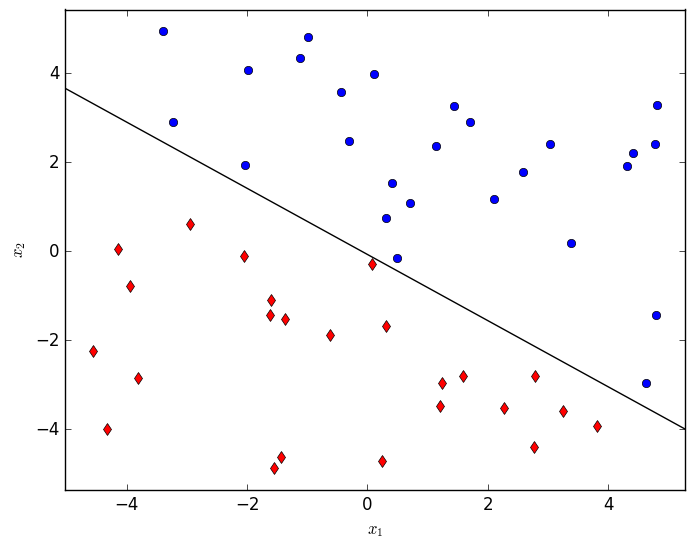

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32b113110>

In [9]:
# plot the fit and the margin
clf() # clears the previous figure
plotdata()
plotline(w_hinge[1:2],w_hinge[end])
# savefig(("hingeloss.pdf"))

To show the idea of "margin", we'll solve the constrained (rather than regularized) version of the problem, using a convex optimization solver. (Take Convex Optimization next semester to understand how this solver works.)

In [10]:
using Convex, ECOS
set_default_solver(ECOSSolver(verbose=false))
wc = Variable(size(Xoffset,2))
y_as_int = [yi ? 1 : -1 for yi in y]
prob = minimize(norm(wc[1:2]), 
sum(max(1-y_as_int.*(Xoffset*wc),0))<=0)
solve!(prob)
w_hinge = vec(wc.value)

(size(coeff),size(var)) = ((50,1),(50,1))


3-element Array{Float64,1}:
  3.42811  
  4.19803  
 -0.0689108

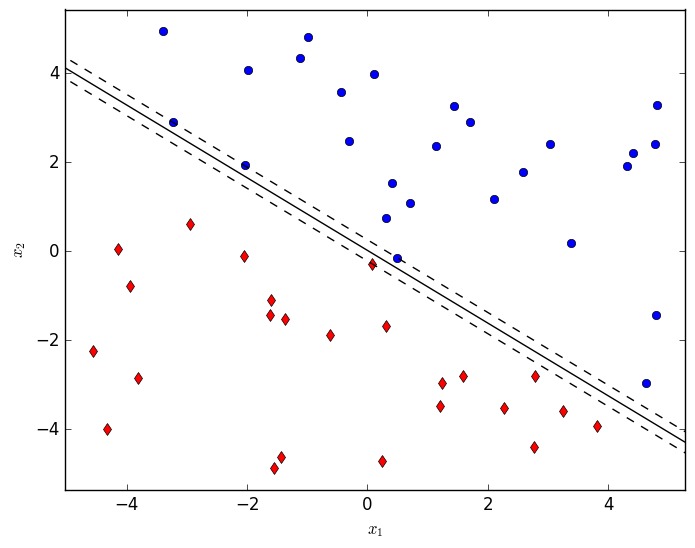

In [11]:
# plot the fit and the margin
clf() # clears the previous figure
plotdata()
plotline(w_hinge[1:2],w_hinge[end])

w = w_hinge[1:2]
for b = [w_hinge[3]+1, w_hinge[3]-1]
    x1samples = [-100, 100]
    # w[1]*x[1]+w[2]*x[2]+b = 0
    x2samples = (-b - w[1]*x1samples)/w[2]
    plot(x1samples, x2samples, color="black", linestyle="--")
end
# savefig("svm.pdf")

In [ ]:
# plot the fit and the margin
clf() # clears the previous figure
plotdata()
plotline(w_hinge[1:2],w_hinge[end])

w = w_hinge[1:2]
for b = [w_hinge[3]+1, w_hinge[3]-1]
    x1samples = [-100, 100]
    # w[1]*x[1]+w[2]*x[2]+b = 0
    x2samples = (-b - w[1]*x1samples)/w[2]
    plot(x1samples, x2samples, color="black", linestyle="--")
end
# savefig("svm.pdf")

ideas to add to picture: 
* margin
* support vectors

# logistic regression

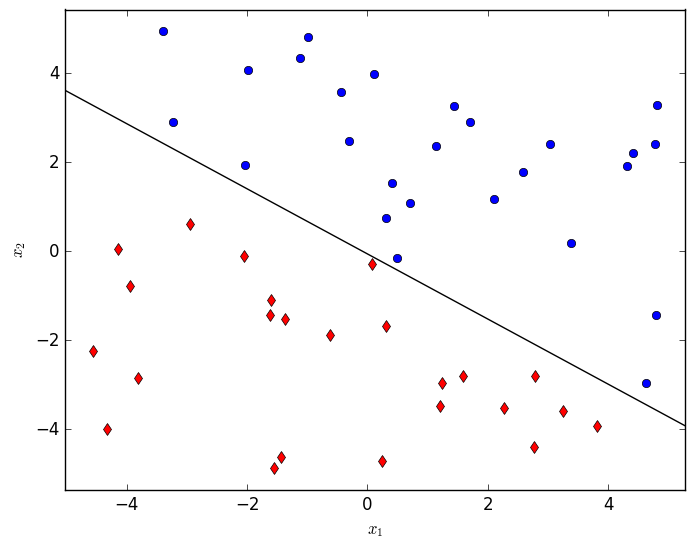

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3276c3b50>

In [12]:
Xoffset = [X ones(n)]
w_logistic = proxgrad(1/n*LogisticLoss(), ZeroReg(), Xoffset, y, stepsize=1, maxiters=1000)

# plot the fit
clf() # clears the previous figure
plotdata()
plotline(w_logistic[1:2], w_logistic[3])
# savefig("logisticloss.pdf")

In [13]:
# probability of ±1

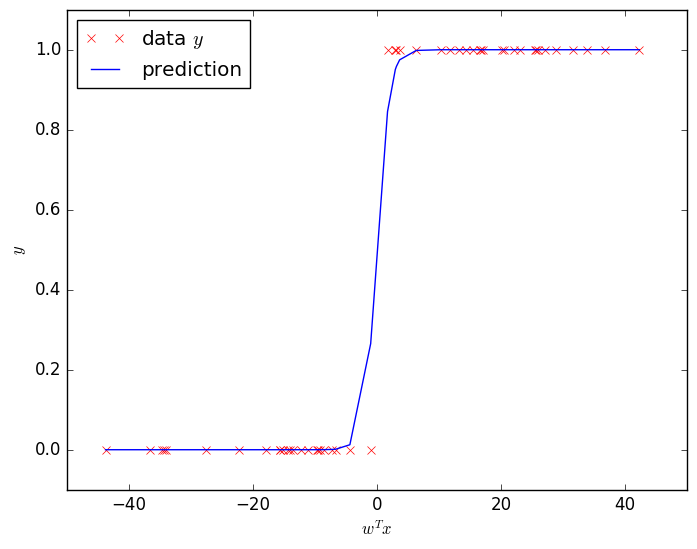

done


In [15]:
z = Xoffset*w_logistic
plot(z, y, "rx", label = L"data $y$")
plot(sort(z), sort(1./(1+exp(-z))), label = "prediction")
ylim(-.1, 1.1)
legend(loc=2)
xlabel(L"$w^T x$")
ylabel(L"$y$")
# savefig("logistic_data_v_prediction.eps")
println("done")